In [1]:
import tensorflow as tf
import keras
import numpy as np
%matplotlib inline
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Input, Flatten
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\Banipreet\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv('A_Z Handwritten Data.csv')

In [11]:
X = data.iloc[:, 1:].values
y = data.iloc[:,0].values
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.027, random_state = 0)

In [12]:
print(X_train.shape)
print(X_test.shape)

(362393, 784)
(10057, 784)


O


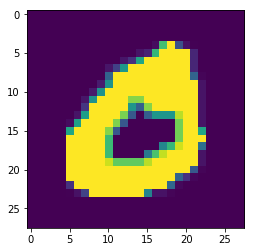

In [13]:
xtest = X_train[2]
xtest = xtest.reshape([28,28])
ytest = y_train[2]
plt.imshow(xtest)
print(chr(ord('A')+ytest))

In [14]:
num_classes= 26
input_shape = (28,28,1)
X_train = np.reshape(X_train, [X_train.shape[0],28,28,1])
X_test = np.reshape(X_test, [X_test.shape[0],28,28,1])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)

(362393, 26)


In [15]:
def alphaModel(input_shape = (28, 28, 1)):
    X_input = Input(input_shape)
    X = Conv2D(filters = 32, kernel_size = (5, 5), strides = (1,1), padding = 'same',activation='relu')(X_input)
    X = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')(X)

    X = Conv2D(filters = 64, kernel_size = (5,5), strides = (1,1), padding = 'same', activation='relu')(X)
    X = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')(X)
    X = Flatten()(X)
    X = Dense(1024, activation='relu', kernel_initializer='TruncatedNormal',bias_initializer='zeros')(X)
    X = Dense(num_classes, activation='softmax', kernel_initializer='TruncatedNormal',bias_initializer='zeros')(X)
    
    model = Model(inputs = X_input, outputs = X, name='alphaModel')

    return model

In [16]:
model = alphaModel(input_shape = (28,28,1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              3212288   
__________

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
X_train = X_train/255
X_test = X_test/255
hist = model.fit(X_train, y_train,
          batch_size=512,
          epochs=10,
          validation_data=(X_test, y_test), 
          )

Train on 362393 samples, validate on 10057 samples
Epoch 1/10
362393/362393 [==============================] - 54s - loss: 0.1535 - acc: 0.9571 - val_loss: 0.0647 - val_acc: 0.9829
Epoch 2/10
362393/362393 [==============================] - 56s - loss: 0.0449 - acc: 0.9872 - val_loss: 0.0455 - val_acc: 0.9876
Epoch 3/10
362393/362393 [==============================] - 51s - loss: 0.0291 - acc: 0.9915 - val_loss: 0.0414 - val_acc: 0.9900
Epoch 4/10
362393/362393 [==============================] - 51s - loss: 0.0199 - acc: 0.9937 - val_loss: 0.0345 - val_acc: 0.9908
Epoch 5/10
362393/362393 [==============================] - 50s - loss: 0.0141 - acc: 0.9954 - val_loss: 0.0273 - val_acc: 0.9931
Epoch 6/10
362393/362393 [==============================] - 51s - loss: 0.0109 - acc: 0.9964 - val_loss: 0.0294 - val_acc: 0.9925
Epoch 7/10
362393/362393 [==============================] - 51s - loss: 0.0088 - acc: 0.9971 - val_loss: 0.0204 - val_acc: 0.9950
Epoch 8/10
362393/362393 [=============

In [19]:
# save weights to file
model.save_weights("weights.h5")

In [20]:
# load weights from file (can call without model.fit)
model.load_weights("weights.h5")

In [21]:
score = model.evaluate(X_test, y_test)
score2 = model.evaluate(X_train, y_train)
print("Train Accuracy: "+str(score2[1]*100)+"%")
print("Test Accuracy: "+str(score[1]*100)+"%")

362393/362393 [==============================] - 83s    
Train Accuracy: 99.80408010073693%
Test Accuracy: 99.62215372377449%


In [30]:
from glob import glob
import cv2

In [31]:
test = np.array(glob("Alphabets/*"))

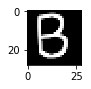

In [32]:
fig=plt.figure(figsize=(len(test), 1))
ctr = 1
b = []
for img_path in test:
    img = cv2.imread(img_path)
    fig.add_subplot(len(test), 1, ctr)
    plt.imshow(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    (thresh, im_bw) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    b.append(im_bw)
    ctr += 1
    
    
b = np.array(b)
b = np.reshape(b, [b.shape[0],b.shape[1],b.shape[2],1])
b = model.predict(b)

In [33]:
for ans in b:
    temp = np.argmax(ans)
    print(chr(ord('A')+temp))

B
